# **What drives ad performance?**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/bank-full.csv"
bank = pd.read_csv(file_name, sep=';')

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# summary of dataset
print('Rows: ',bank.shape[0])
print('Columns: ',bank.shape[1])
print('\ncolumns name: ',bank.columns)
print('\nMissing values : \n',bank.isnull().sum())
print('\nUnique values : \n',bank.nunique())

Rows:  45211
Columns:  17

columns name:  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Missing values : 
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Unique values : 
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# trnaform importatn columns to numirical data
bank['y'] = bank['y'].apply(lambda x : 0 if x == "no" else 1)
bank['housing'] = bank['housing'].apply(lambda x : 0 if x == "no" else 1)
bank['loan'] = bank['loan'].apply(lambda x : 0 if x == "no" else 1)
bank['default'] = bank['default'].apply(lambda x : 0 if x == "no" else 1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


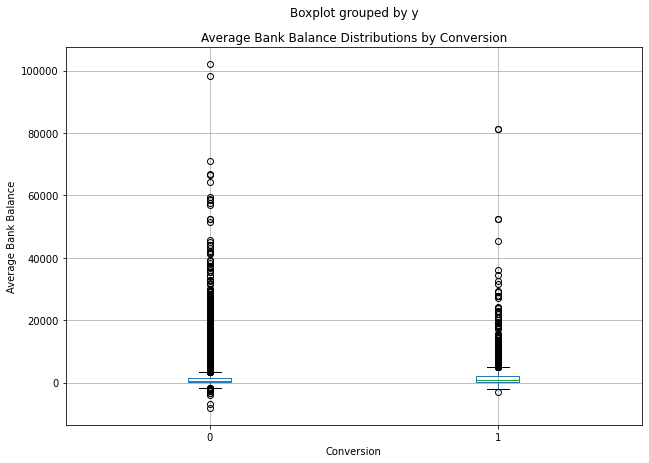

In [7]:
# visualize dataset
bank.boxplot(column = ['balance'] , by = 'y' , figsize=(10, 7))
plt.xlabel('Conversion')
plt.ylabel('Average Bank Balance')
plt.title('Average Bank Balance Distributions by Conversion')
plt.show()



Text(0, 0.5, 'Conversion Rate (%)')

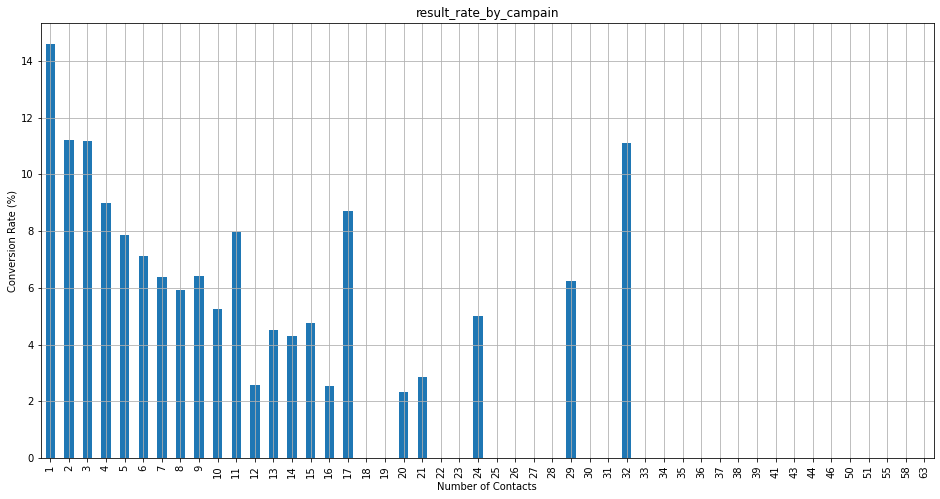

In [8]:
# yes rate by campaign
result_rate_by_campain = round(bank.groupby('campaign')['y'].sum() / bank.groupby('campaign')['y'].count() * 100 , 2)
result_rate_by_campain.plot( kind = 'bar', grid = True , figsize = (16,8) , title = 'result_rate_by_campain' )
plt.xlabel('Number of Contacts')
plt.ylabel('Conversion Rate (%)')

In [9]:
# probing categorical columns
num_col = bank._get_numeric_data().columns
cols = bank.columns
cat_col = list(set(cols) - set(num_col))
for col in cat_col:
  print(col,':\n', bank[col].unique(),'\n')

contact :
 ['unknown' 'cellular' 'telephone'] 

month :
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

marital :
 ['married' 'single' 'divorced'] 

poutcome :
 ['unknown' 'failure' 'other' 'success'] 

job :
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

education :
 ['tertiary' 'secondary' 'unknown' 'primary'] 



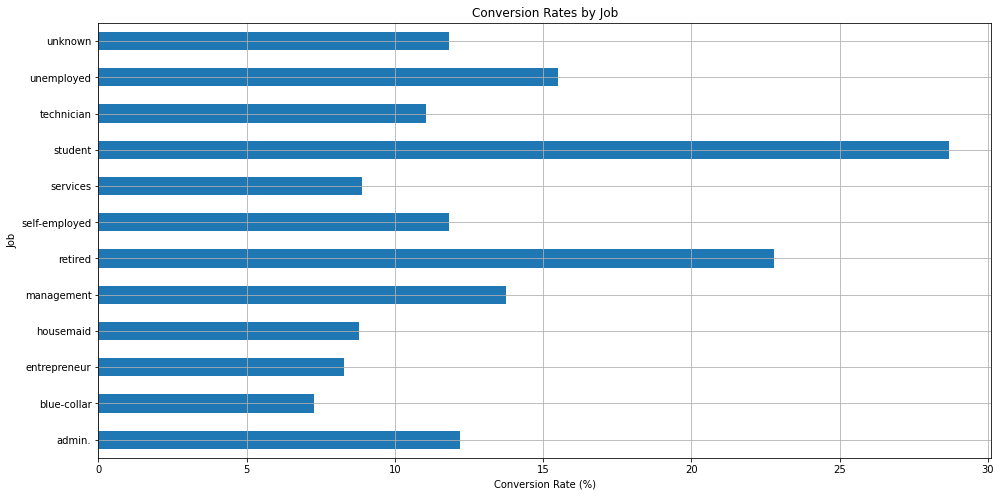

In [10]:
conversion_rate_by_job = round(bank.groupby('job')['y'].sum() / bank.groupby('job')['y'].count() * 100, 2)
conversion_rate_by_job.plot(kind='barh', grid=True, title='Conversion Rates by Job' , figsize = (16,8))
plt.xlabel('Conversion Rate (%)')
plt.ylabel('Job')
plt.show()

In [11]:
# encoding cat columns
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
bank['month'] = bank['month'].apply(lambda x: months.index(x)+1)

bank = pd.get_dummies(data=bank, columns=['contact'])
bank = pd.get_dummies(data=bank, columns=['education'])
bank = pd.get_dummies(data=bank, columns=['poutcome'])
bank = pd.get_dummies(data=bank, columns=['job'])
bank = pd.get_dummies(data=bank, columns=['marital'])


In [13]:
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,0,0,0,0,0,0,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,0,0,0,0,1,0,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,0,0,0,0,0,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,0,0,0,0,0,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,0,0,0,0,1,0,0,1


**Train ML model**

In [14]:
from sklearn.model_selection import train_test_split

X = bank.drop(['y'],axis = True)
y = bank['y']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn import tree
!pip install graphviz
import graphviz

model = tree.DecisionTreeClassifier( max_depth = 5)
model.fit(X_train , y_train)

# We export our tree to a DOT format is a graphic description language
dot_data = tree.export_graphviz(model, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True) 

# Create a visual graph of our tree
graph = graphviz.Source(dot_data)

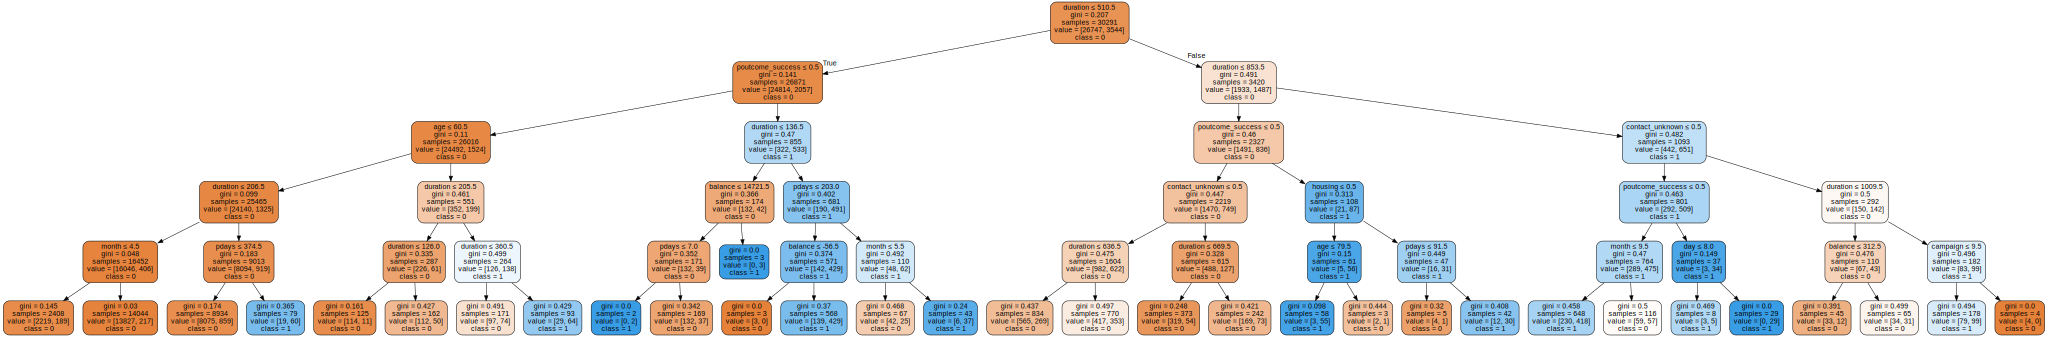

In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))

graph

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_pred = model.predict(X_test) 
conf_mat = confusion_matrix(y_test, y_pred)
print('confusion: \n',conf_mat)
print('\naccuracy_score: ',accuracy_score(y_test, y_pred))

confusion: 
 [[12856   319]
 [ 1183   562]]

accuracy_score:  0.8993297587131367
